In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!ln -s /content/drive/My\ Drive/ /my\drive

ln: failed to create symbolic link '/mydrive/My Drive': Operation not supported


In [4]:
import pandas as pd

In [5]:
train = pd.read_csv('/mydrive/data/labeledTrainData.tsv',delimiter='\t',quoting=3)
test = pd.read_csv('/mydrive/data/testData.tsv', delimiter='\t',quoting=3)
train.shape
test.shape

(25000, 2)

In [6]:
train.columns.values

array(['id', 'sentiment', 'review'], dtype=object)

In [7]:
test.columns.values

array(['id', 'review'], dtype=object)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         25000 non-null  object
 1   sentiment  25000 non-null  int64 
 2   review     25000 non-null  object
dtypes: int64(1), object(2)
memory usage: 586.1+ KB


In [9]:
train.describe()

,sentiment
count,25000.00000
mean,0.50000
std,0.50001
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [10]:
import numpy as np
train.describe(exclude=[np.number])

,id,review
count,25000,25000
unique,25000,24904
top,"""3595_10""","""This show comes up with interesting locations..."
freq,1,3


In [11]:
train['sentiment'].value_counts()

1    12500
0    12500
Name: sentiment, dtype: int64

In [12]:
train['review'][0][:700]

'"With all this stuff going down at the moment with MJ i\'ve started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ\'s feeling towards the press and also the obvious message of drugs are bad m\'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely lik'

In [13]:
from bs4 import BeautifulSoup
example1 = BeautifulSoup(train['review'][0], "html5lib")
print(train['review'][0][:700])
example1.get_text()[:700]

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely lik


'"With all this stuff going down at the moment with MJ i\'ve started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ\'s feeling towards the press and also the obvious message of drugs are bad m\'kay.Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyw'

In [14]:
import re
letters_only = re.sub('[^a-zA-Z]',' ',example1.get_text())
letters_only[:700]

' With all this stuff going down at the moment with MJ i ve started listening to his music  watching the odd documentary here and there  watched The Wiz and watched Moonwalker again  Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent  Moonwalker is part biography  part feature film which i remember going to see at the cinema when it was originally released  Some of it has subtle messages about MJ s feeling towards the press and also the obvious message of drugs are bad m kay Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyw'

In [15]:
lower_case = letters_only.lower()
words = lower_case.split()
print(len(words))
words[:10]

437


['with',
 'all',
 'this',
 'stuff',
 'going',
 'down',
 'at',
 'the',
 'moment',
 'with']

In [16]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')[:10]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [17]:
words = [w for w in words if not w in stopwords.words('english')]
print(len(words))
words[:10]

219


['stuff',
 'going',
 'moment',
 'mj',
 'started',
 'listening',
 'music',
 'watching',
 'odd',
 'documentary']

In [18]:
stemmer = nltk.stem.PorterStemmer()
print(stemmer.stem('maximum'))
print('The stemmed form of running is: {}'.format(stemmer.stem('running')))
print('The stemmed form of runs is: {}'.format(stemmer.stem('runs')))
print('the stemmed form of run is {}'.format(stemmer.stem('run')))

maximum
The stemmed form of running is: run
The stemmed form of runs is: run
the stemmed form of run is run


In [19]:
from nltk.stem.lancaster import LancasterStemmer
lancaster_stemmer = LancasterStemmer()
print(lancaster_stemmer.stem('maximum'))
print('The stemmed form of running is: {}'.format(lancaster_stemmer.stem('running')))
print('The stemmed form of runs is: {}'.format(lancaster_stemmer.stem('runs')))
print('the stemmed form of run is {}'.format(lancaster_stemmer.stem('run')))

maxim
The stemmed form of running is: run
The stemmed form of runs is: run
the stemmed form of run is run


In [20]:
words[:10]

['stuff',
 'going',
 'moment',
 'mj',
 'started',
 'listening',
 'music',
 'watching',
 'odd',
 'documentary']

In [21]:
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer('english')
words= [stemmer.stem(w) for w in words]

words[:10]

['stuff',
 'go',
 'moment',
 'mj',
 'start',
 'listen',
 'music',
 'watch',
 'odd',
 'documentari']

In [22]:
import nltk
nltk.download('wordnet')
  
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [23]:
print(wordnet_lemmatizer.lemmatize('fly'))
print(wordnet_lemmatizer.lemmatize('flies'))

fly
fly


In [24]:
words = [wordnet_lemmatizer.lemmatize(w) for w in words]

words[:10]

['stuff',
 'go',
 'moment',
 'mj',
 'start',
 'listen',
 'music',
 'watch',
 'odd',
 'documentari']

In [25]:
def review_to_words(raw_review):
    review_text = BeautifulSoup(raw_review,'html.parser').get_text()
    letters_only = re.sub('[^a-zA-Z]',' ',review_text)
    words = letters_only.lower().split()
    stops = set(stopwords.words('english'))
    meaningful_words = [w for w in words if not w in stops]
    stemming_words = [stemmer.stem(w) for w in meaningful_words]
    return(' '.join(stemming_words) )

In [26]:
clean_review = review_to_words(train['review'][0])
clean_review

'stuff go moment mj start listen music watch odd documentari watch wiz watch moonwalk mayb want get certain insight guy thought realli cool eighti mayb make mind whether guilti innoc moonwalk part biographi part featur film rememb go see cinema origin releas subtl messag mj feel toward press also obvious messag drug bad kay visual impress cours michael jackson unless remot like mj anyway go hate find bore may call mj egotist consent make movi mj fan would say made fan true realli nice actual featur film bit final start minut exclud smooth crimin sequenc joe pesci convinc psychopath power drug lord want mj dead bad beyond mj overheard plan nah joe pesci charact rant want peopl know suppli drug etc dunno mayb hate mj music lot cool thing like mj turn car robot whole speed demon sequenc also director must patienc saint came film kiddi bad sequenc usual director hate work one kid let alon whole bunch perform complex danc scene bottom line movi peopl like mj one level anoth think peopl stay

In [27]:
num_reviews = train['review'].size
num_reviews

25000

In [28]:
from multiprocessing import Pool
import numpy as np

def _apply_df(args):
    df,func,kwargs = args
    return df.apply(func, **kwargs)

def apply_by_multiprocessing(df,func, **kwargs):
    workers = kwargs.pop('workers')
    pool = Pool(processes = workers)
    result = pool.map(_apply_df, [(d, func,kwargs) for d in np.array_split(df, workers)])
    pool.close()
    
    return pd.concat(list(result))

In [29]:
%time clean_train_reviews = apply_by_multiprocessing(train['review'], review_to_words, workers=4)

CPU times: user 119 ms, sys: 158 ms, total: 277 ms
Wall time: 47.5 s


In [30]:
!pip install wordcloud

In [31]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

CPU times: user 17.9 s, sys: 1 s, total: 18.9 s
Wall time: 18.9 s


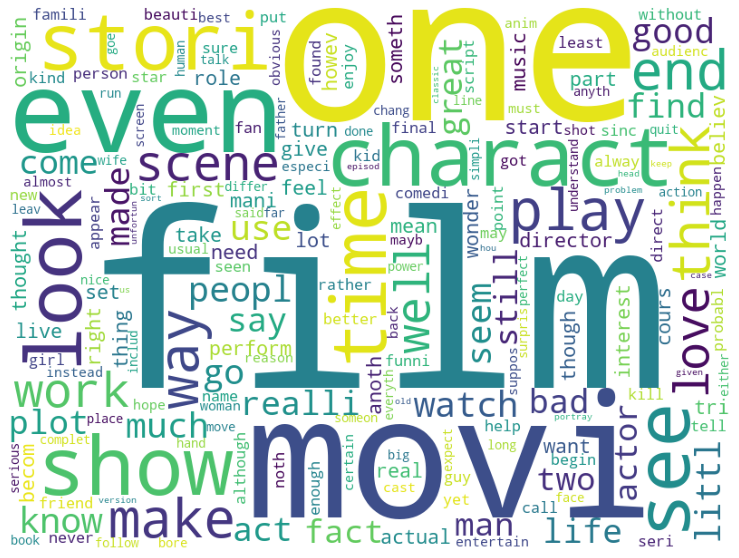

In [32]:
def displayWordCloud(data = None, backgroundcolor='white', width=800, height=600):
  wordcloud = WordCloud(stopwords = STOPWORDS, background_color=backgroundcolor, width=width,height=height).generate(data)
  plt.figure(figsize=(15,10))
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show
%time displayWordCloud(''.join(clean_train_reviews))

In [33]:
%time clean_test_reviews = apply_by_multiprocessing(test['review'], review_to_words, workers=4)

CPU times: user 118 ms, sys: 144 ms, total: 262 ms
Wall time: 46.4 s


CPU times: user 17.5 s, sys: 633 ms, total: 18.2 s
Wall time: 18.2 s


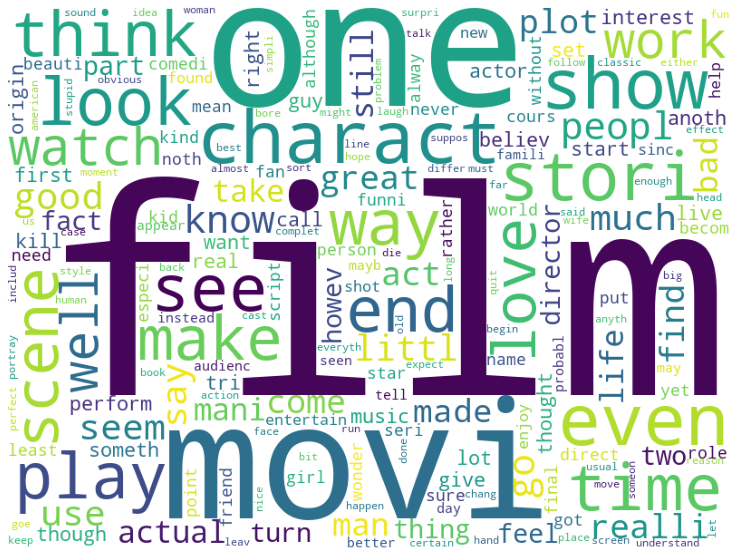

In [34]:
%time displayWordCloud(''.join(clean_test_reviews))

In [35]:
train['num_words'] = clean_train_reviews.apply(lambda x:len(str(x).split()))
train['num_uniq_words'] = clean_train_reviews.apply(lambda x: len(set(str(x).split())))

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              25000 non-null  object
 1   sentiment       25000 non-null  int64 
 2   review          25000 non-null  object
 3   num_words       25000 non-null  int64 
 4   num_uniq_words  25000 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 976.7+ KB


In [36]:
x = clean_train_reviews[0]
x = str(x).split()
print(len(x))
x[:10]

219


['stuff',
 'go',
 'moment',
 'mj',
 'start',
 'listen',
 'music',
 'watch',
 'odd',
 'documentari']

리뷰별 단어 평균 값: 119.52356
리뷰별 단어 중간 값: 89.0
리뷰별 고유 단어 평균 값: 94.05756
리뷰별 고유 단어 중간 값: 74.0


Text(0.5, 1.0, '리뷰별 고유한 단어 수 분포')

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47532 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48624 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45800 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50612 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_

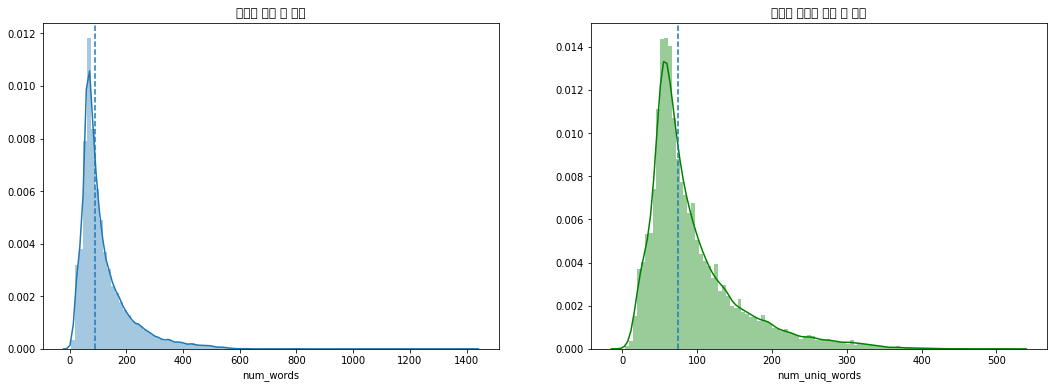

In [46]:
import seaborn as sns

fig,axes = plt.subplots(ncols=2)
fig.set_size_inches(18,6)
print('리뷰별 단어 평균 값:',train['num_words'].mean())
print('리뷰별 단어 중간 값:', train['num_words'].median())
sns.distplot(train['num_words'], bins=100, ax=axes[0])
axes[0].axvline(train['num_words'].median(), linestyle='dashed')
axes[0].set_title('리뷰별 단어 수 분포')

print('리뷰별 고유 단어 평균 값:', train['num_uniq_words'].mean())
print('리뷰별 고유 단어 중간 값:', train['num_uniq_words'].median())
sns.distplot(train['num_uniq_words'], bins = 100, color='g', ax=axes[1])
axes[1].axvline(train['num_uniq_words'].median(),linestyle='dashed')
axes[1].set_title('리뷰별 고유한 단어 수 분포')

In [49]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

vectorizer = CountVectorizer(analyzer = 'word', tokenizer = None, preprocessor = None, stop_words = None, min_df = 2, ngram_range=(1,3), max_features=20000)
vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=20000, min_df=2,
                ngram_range=(1, 3), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [51]:
pipeline = Pipeline([('vect', vectorizer),])

%time train_data_features = pipeline.fit_transform(clean_train_reviews)
train_data_features

CPU times: user 30.9 s, sys: 939 ms, total: 31.8 s
Wall time: 31.8 s


<25000x20000 sparse matrix of type '<class 'numpy.int64'>'
	with 2762268 stored elements in Compressed Sparse Row format>

In [52]:
train_data_features.shape

vocab = vectorizer.get_feature_names()
print(len(vocab))
vocab[:10]

20000


['aag',
 'aaron',
 'ab',
 'abandon',
 'abbey',
 'abbi',
 'abbot',
 'abbott',
 'abc',
 'abduct']

In [53]:
import numpy as np
dist = np.sum(train_data_features, axis=0)

for tag, count in zip(vocab, dist): 
  print(count, tag)

pd.DataFrame(dist, columns=vocab)

[[26 48 22 ... 59 40 23]] aag


,aag,aaron,ab,abandon,abbey,abbi,abbot,abbott,abc,abduct,abe,abhay,abid,abigail,abil,abil make,abl,abl get,abl make,abl see,abl watch,abli,aboard,abomin,aborigin,abort,abound,abraham,abraham lincoln,abroad,abrupt,absenc,absent,absolut,absolut aw,absolut brilliant,absolut hilari,absolut horribl,absolut love,absolut noth,...,yuen,yugoslavia,yup,yuppi,yuzna,yvonn,zabriski,zabriski point,zach,zack,zane,zani,zatoichi,zealand,zelah,zelah clark,zelda,zenia,zero,zero day,zero star,zeta,zeta jone,zhang,zip,zizek,zodiac,zodiac killer,zoe,zombi,zombi bloodbath,zombi film,zombi flick,zombi movi,zone,zoo,zoom,zorro,zu,zucker
0,26,48,22,288,24,30,29,30,125,55,24,28,28,26,562,25,1259,53,32,54,35,27,37,83,69,92,63,93,29,38,136,118,83,1850,29,35,42,23,93,154,...,21,28,26,32,25,25,40,36,22,21,70,38,33,47,43,34,28,31,390,44,32,38,37,37,23,85,45,26,27,1331,23,52,37,89,161,31,71,59,40,23


In [54]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 100, n_jobs=-1, random_state=2018)
model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=2018, verbose=0,
                       warm_start=False)

In [55]:
%time model = model.fit(train_data_features, train['sentiment'])

CPU times: user 1min 23s, sys: 73.6 ms, total: 1min 23s
Wall time: 42.6 s


In [58]:
from sklearn.model_selection import cross_val_score
%time score = np.mean(cross_val_score(model, train_data_features, train['sentiment'], cv=10, scoring='roc_auc'))
score

CPU times: user 8.66 s, sys: 876 ms, total: 9.54 s
Wall time: 6min 18s


0.92761104

In [59]:
clean_test_reviews[0]

'natur film main theme mortal nostalgia loss innoc perhap surpris rate high older viewer younger one howev craftsmanship complet film anyon enjoy pace steadi constant charact full engag relationship interact natur show need flood tear show emot scream show fear shout show disput violenc show anger natur joyc short stori lend film readi made structur perfect polish diamond small chang huston make inclus poem fit neat truli masterpiec tact subtleti overwhelm beauti'

In [60]:
%time test_data_features = pipeline.transform(clean_test_reviews)
test_data_features = test_data_features.toarray()

CPU times: user 6.51 s, sys: 12.6 ms, total: 6.52 s
Wall time: 6.52 s


In [61]:
test_data_features

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [62]:
test_data_features[5][:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [63]:
vocab[8], vocab[2558], vocab[2559], vocab[2560]

('abc', 'charact person', 'charact play', 'charact plot')

In [64]:
result = model.predict(test_data_features)
result[:10]

array([1, 0, 0, 1, 1, 1, 0, 1, 0, 0])

In [65]:
output = pd.DataFrame(data={'id':test['id'],'sentiment':result})
output.head()

,id,sentiment
0,"""12311_10""",1
1,"""8348_2""",0
2,"""5828_4""",0
3,"""7186_2""",1
4,"""12128_7""",1


In [66]:
output.to_csv('/mydrive/data/tutorial_1_BOW_{0:.5f}.csv'.format(score), index=False, quoting=3)

In [67]:
output_sentiment = output['sentiment'].value_counts()
print(np.abs(output_sentiment[0] - output_sentiment[1]))
output_sentiment

108


0    12554
1    12446
Name: sentiment, dtype: int64

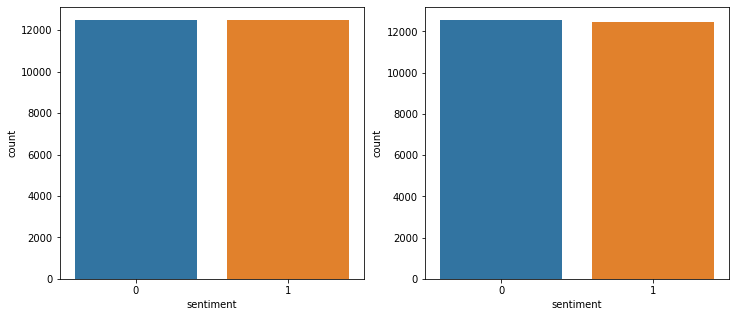

In [68]:
fig, axes = plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.countplot(train['sentiment'], ax=axes[0])
sns.countplot(output['sentiment'], ax=axes[1])

In [69]:
print(436/578) #uni-gram

0.754325259515571


In [70]:
print(388/578) #tri-gram

0.671280276816609


In [71]:
print(339/578) #어간 추출

0.5865051903114187
